In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [5]:
df = pd.read_csv(r'/Users/arshita/Documents/Machine learning/Case Study 9 Drivers/driver-data.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [9]:
df = df.drop('id', axis = 1)
df

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


## Standardscalar Model

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

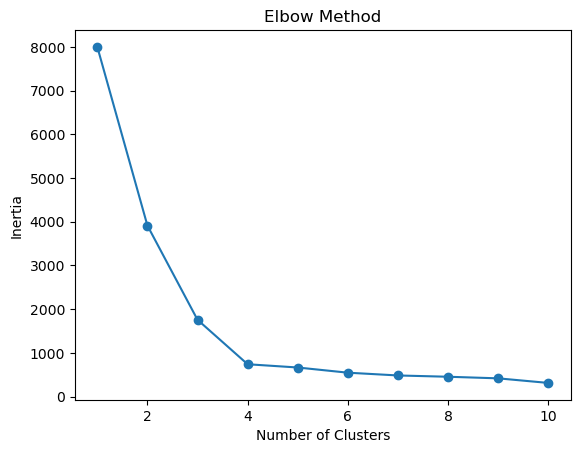

In [18]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [20]:
#applying kmeans clustering

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [22]:
# Group by cluster to see average stats
df.groupby('cluster').mean()

,mean_dist_day,mean_over_speed_perc
cluster,,
0,50.000796,5.972079
1,180.443545,10.492795
2,83.669037,45.128395


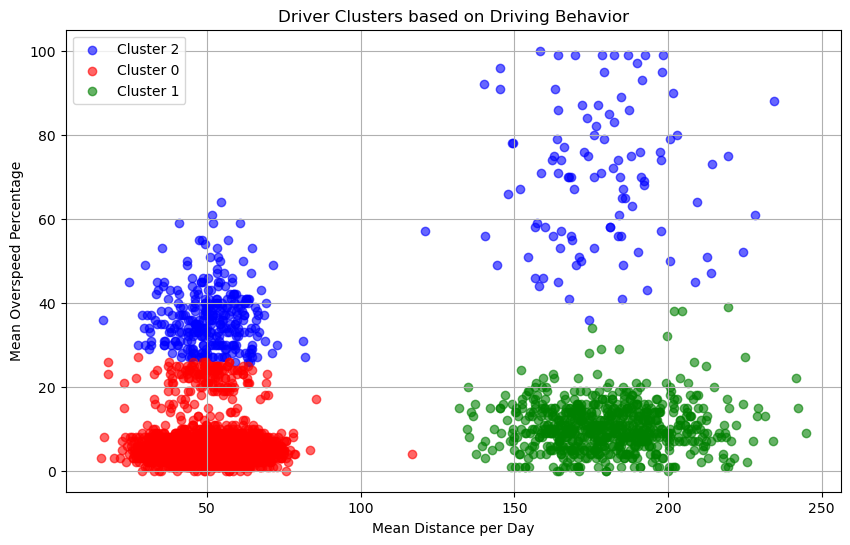

In [24]:
# Assign colors to each cluster
colors = ['red', 'green', 'blue']

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in df['cluster'].unique():
    subset = df[df['cluster'] == cluster]
    plt.scatter(subset['mean_dist_day'], subset['mean_over_speed_perc'],
                label=f'Cluster {cluster}', color=colors[cluster], alpha=0.6)

plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Overspeed Percentage')
plt.title('Driver Clusters based on Driving Behavior')
plt.legend()
plt.grid(True)
plt.show()